# 01 Discovery: European Soccer Database

Discovery notebook used to explore the European Soccer database from Kaggle.

## Connect to the database and list the tables and columns

In [34]:
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# path to the database file - update as needed
db_path = '../data/database.sqlite'

conn = sqlite3.connect(db_path)

# Use the metadata table "sqlite_master" to list the tables in this database
# Ignore any internal tables (they start with 'sqlite')
tables = pd.read_sql("""SELECT name 
                        FROM sqlite_master 
                        WHERE type='table'
                        AND name not like 'sqlite%'; """, conn)

tables

,name
0,Player_Attributes
1,Player
2,Match
3,League
4,Country
5,Team
6,Team_Attributes


In [35]:
# Use the metadata table 'sqlite_master' and the built-in function 
# 'pragma_table_info' to get the columns in the Player_Attributes table

columns = pd.read_sql("""WITH all_tables AS (SELECT name 
                                                FROM sqlite_master 
                                                WHERE type = 'table' 
                                                AND name = 'Player_Attributes') 
                            SELECT at.name table_name, pti.*
                            FROM all_tables at INNER JOIN pragma_table_info(at.name) pti
                            ORDER BY table_name;""", conn)

columns

,table_name,cid,name,type,notnull,dflt_value,pk
0,Player_Attributes,0,id,INTEGER,0,None,1
1,Player_Attributes,1,player_fifa_api_id,INTEGER,0,None,0
2,Player_Attributes,2,player_api_id,INTEGER,0,None,0
3,Player_Attributes,3,date,TEXT,0,None,0
4,Player_Attributes,4,overall_rating,INTEGER,0,None,0
5,Player_Attributes,5,potential,INTEGER,0,None,0
6,Player_Attributes,6,preferred_foot,TEXT,0,None,0
7,Player_Attributes,7,attacking_work_rate,TEXT,0,None,0
8,Player_Attributes,8,defensive_work_rate,TEXT,0,None,0
9,Player_Attributes,9,crossing,INTEGER,0,None,0


## Explore some of the categorical and numeric fields

### Overall Rating field

In [36]:
overall_rating_summary = pd.read_sql("""SELECT 
                                        MIN(overall_rating) AS 'Min Rating', 
                                        MAX(overall_rating) AS 'Max Rating', 
                                        ROUND(AVG(overall_rating),0) AS 'Average Rating'
                                    FROM Player_Attributes""", conn)

overall_rating_summary

,Min Rating,Max Rating,Average Rating
0,33,94,69.0


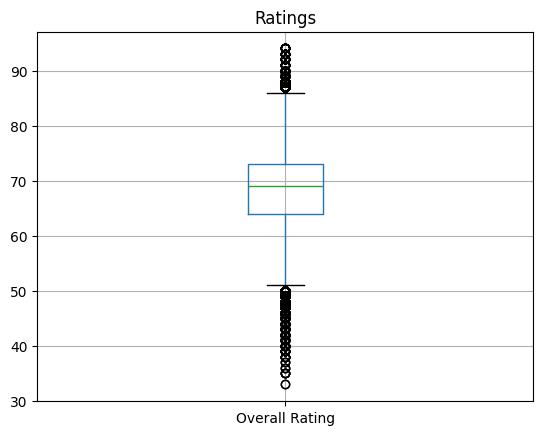

In [39]:
overall_ratings = pd.read_sql("""SELECT overall_rating AS 'Overall Rating' FROM Player_Attributes""", conn)
or_plt = overall_ratings.boxplot(column='Overall Rating', )
or_plt.plot()
plt.title("Ratings")
plt.show()

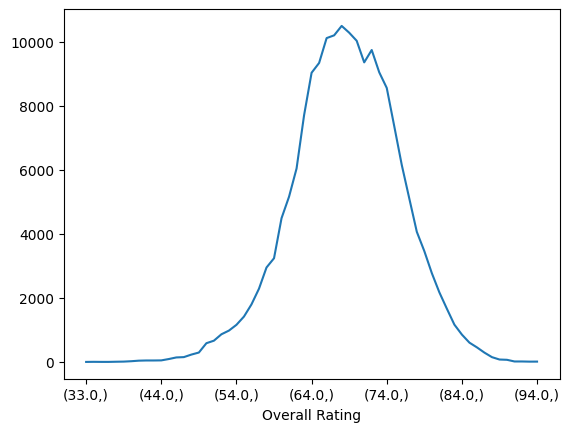

In [57]:
vc_plt = overall_ratings.value_counts().sort_index().plot()
plt.plot()
plt.show()

###  Preferred Foot field

In [59]:
preferred_foot = pd.read_sql("""SELECT preferred_foot AS 'Preferred Foot' FROM Player_Attributes""", conn)
preferred_foot.value_counts()

Preferred Foot
right             138409
left               44733
Name: count, dtype: int64

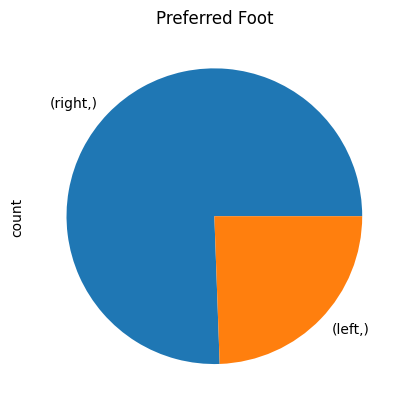

In [65]:
preferred_foot.value_counts().plot(kind='pie', title='Preferred Foot')
plt.plot()
plt.show()